In [1]:
import requests
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json 

## Gathering Data

In [2]:
# Read the provided twitter achive enhanced file into a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
# Download the image-predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url,)
with open("image-predictions","wb") as file:
    file.write(response.content)


In [4]:
# Read the image prediction file into a dataframe
image = pd.read_csv('image-predictions', sep= '\t')

In [5]:
# Read the tweet-json file from line to line
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()


In [6]:
# Pull out needed data: tweet_id, retweet_count, and favorite_count 
tweet_id = []
retweet_count = []
favorite_count = []
for line in lines:
    # print line
    line_dic = json.loads(line)
    tweet_id.append(line_dic['id_str'])
    retweet_count.append(line_dic['retweet_count'])
    favorite_count.append(line_dic['favorite_count'])

In [7]:
# Check if all values where correctly pulled out
print(len(tweet_id), len(retweet_count), len(favorite_count))

2354 2354 2354


In [8]:
# Create a dataframe from the extracted data
tweet_dic = {'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count}
count = pd.DataFrame.from_dict(tweet_dic)

## Assessing Data

In [9]:
# Display achive to assess data visually
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- Assess the archive data programmatically

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
archive.duplicated().sum()

0

In [14]:
archive.text[82]

"This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6"

In [15]:
archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [16]:
archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [17]:
archive.source[23]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [18]:
archive.rating_numerator[82]

12

In [19]:
archive.name[2351]

'None'

In [20]:
dog_stage = archive[['doggo', 'floofer', 'pupper', 'puppo']]
dog_stage.head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [21]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
# Display image prediction to assess data visually
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- Assess image prediction data programmatically

In [26]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
image.duplicated().sum()

0

In [30]:
# Check for images that are not dog
image[(image.p1_dog == False) & (image.p2_dog == False) & (image.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [31]:
# Display count to assess data visually
count.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


- Assess count data programmatically 

In [32]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [33]:
count.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [34]:
count.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [35]:
count.duplicated().sum()

0

## Quality issues found in the three DataFrames

- The tweet id column in the twitter archive enhanced dataframe should be a string and not an integer.
- The tweet id column in the image prediction dataframe should be a string and not an integer.
- Timestamp in the tweet archive enhanced dataframe is a string instead of datetime.
- There are incorrect values in the column for name found in the tweet archive enhanced dataframe.
- There are lots of columns with missing values.
- Some of the images in the image prediction dataframe are not dogs.
- The expanded urls column is not necessary, it is only differentiated by the tweet id.
- Displaying the source column in a categorical format might make the information more clear and easier to understand. 

## Tidiness or structural issues found in the three DataFrames

- The four columns for dog stages i.e doggo, floofer, pupper and puppo contain same data and should be merged as one single column called "dog stages".
- The three datasets; "twitter-archive-enhanced.csv", "image-predictions.tsv", and "tweet-json.txt ought to be merged as one.


## Cleaning Data

## Structural cleaning

We are going to tidy up the dataframes first.

In [36]:
archive_clean = archive.copy()
image_clean = image.copy()
count_clean = count.copy()

## Define

- Merge the three columns "doggo, floofer, pupper and puppo" to become one column called "dog stage".
- Take down the doggo, floofer, pupper and puppo columns.

## Code

In [37]:
archive_clean['dog_stage'] = archive_clean.doggo + ' '+ archive_clean.floofer + ' '+ archive_clean.pupper + ' '+archive_clean.puppo
archive_clean.dog_stage = archive_clean.dog_stage.str.replace('None', '')
archive_clean.dog_stage = archive_clean.dog_stage.str.strip()
archive_clean.dog_stage[archive_clean.dog_stage == ''] = archive_clean[archive_clean.dog_stage == ''].dog_stage.str.replace('', 'None')
archive_clean.dog_stage = archive_clean.dog_stage.str.replace('\s+','/')
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace= True)

<ipython-input-37-f94d2ef94ebc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.dog_stage[archive_clean.dog_stage == ''] = archive_clean[archive_clean.dog_stage == ''].dog_stage.str.replace('', 'None')
<ipython-input-37-f94d2ef94ebc>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean.dog_stage = archive_clean.dog_stage.str.replace('\s+','/')


## Test 

In [38]:
archive_clean.dog_stage.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo/pupper       12
floofer             9
doggo/floofer       1
doggo/puppo         1
Name: dog_stage, dtype: int64

## Define

- To be able to merge all three dataframes, convert tweet_id in the archive_clean and image_clean dataframes to strings.

## Code

In [39]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)

## Test

In [40]:
print(type(archive_clean.tweet_id[0]))
print(type(image_clean.tweet_id[0]))

<class 'str'>
<class 'str'>


## Define

- Join all three dataframes together

## Code

In [41]:
# Join all three dataframes
# https://www.statology.org/pandas-merge-multiple-dataframes/

from functools import reduce

# define list of dataframes
tweet_dog_ratings = [archive_clean, image_clean, count_clean]

# merge all dataframes into one
tweet_dog_ratings = reduce(lambda left, right: pd.merge(left, right, on= ['tweet_id'], how = 'outer'), [archive_clean, image_clean, count_clean])

In [42]:
tweet_dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

## Quality cleaning

## Define

Remove the retweets.

## Code

In [43]:
 tweet_dog_ratings = tweet_dog_ratings[tweet_dog_ratings.retweeted_status_id.isnull()]

## Test

In [44]:
assert tweet_dog_ratings.retweeted_status_id.notnull().sum() == 0

### Note:
The tweet id columns in the archive and image dataframes have already been converted to string before the dataframes were merged to become "tweet_dog_ratings". Next we would be changing timestamp to datetime.

## Define

Change timestamp from string to datetime.

## Code

In [45]:
tweet_dog_ratings['timestamp'] = pd.to_datetime(tweet_dog_ratings['timestamp'])

## Test

In [46]:
tweet_dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

## Define

Replace all incorrect names in the column for name with "none" 

## Code

In [47]:
tweet_dog_ratings.name[tweet_dog_ratings.name.str.islower()] = tweet_dog_ratings[tweet_dog_ratings.name.str.islower()].name.str.replace(r'^[a-z]+', 'None', regex=True)

<ipython-input-47-0fc50e04271d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_dog_ratings.name[tweet_dog_ratings.name.str.islower()] = tweet_dog_ratings[tweet_dog_ratings.name.str.islower()].name.str.replace(r'^[a-z]+', 'None', regex=True)


## Test

In [48]:
tweet_dog_ratings.name[tweet_dog_ratings.name.str.islower()]

Series([], Name: name, dtype: object)

## Define

Take down columns with missing values

## Code

In [49]:
tweet_dog_ratings.isnull().mean() * 100

tweet_id                        0.000000
in_reply_to_status_id          96.413793
in_reply_to_user_id            96.413793
timestamp                       0.000000
source                          0.000000
text                            0.000000
retweeted_status_id           100.000000
retweeted_status_user_id      100.000000
retweeted_status_timestamp    100.000000
expanded_urls                   2.666667
rating_numerator                0.000000
rating_denominator              0.000000
name                            0.000000
dog_stage                       0.000000
jpg_url                         8.321839
img_num                         8.321839
p1                              8.321839
p1_conf                         8.321839
p1_dog                          8.321839
p2                              8.321839
p2_conf                         8.321839
p2_dog                          8.321839
p3                              8.321839
p3_conf                         8.321839
p3_dog          

In [50]:
# Columns to take down are "in_reply_to_status_id", "in_reply_to_user_id", retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp"

tweet_dog_ratings.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

## Test

In [51]:
tweet_dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   dog_stage           2175 non-null   object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   float64            
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

## Define

Remove rows in the dataframe that are not dogs.

## Code

In [52]:
# The columns with images that are not dogs have missing values for jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog. These are the only columns with null values.
tweet_dog_ratings.dropna(inplace = True)

## Test

In [53]:
tweet_dog_ratings.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
retweet_count         0
favorite_count        0
dtype: int64

## Define

Take down expanded urls column

## Code

In [54]:
tweet_dog_ratings.drop(columns= 'expanded_urls', inplace= True)

## Test

In [55]:
assert 'expanded_urls' not in tweet_dog_ratings.columns

## Define

Place "source" column categorically.

In [56]:
tweet_dog_ratings.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

## Code

In [57]:
source_category = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'iPhone',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web Client',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'
}
tweet_dog_ratings.source = tweet_dog_ratings.source.map(source_category)

In [58]:
tweet_dog_ratings.source.unique()

array(['iPhone', 'Web Client', 'TweetDeck'], dtype=object)

In [59]:
tweet_dog_ratings.source = tweet_dog_ratings.source.astype("category")

## Test

In [60]:
tweet_dog_ratings.source.unique()

['iPhone', 'Web Client', 'TweetDeck']
Categories (3, object): ['iPhone', 'Web Client', 'TweetDeck']

## Storing Data

In [61]:
tweet_dog_ratings.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [62]:
tweet_dog_ratings.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


# Most common source

[Text(0.5, 1.0, 'Most common Source')]

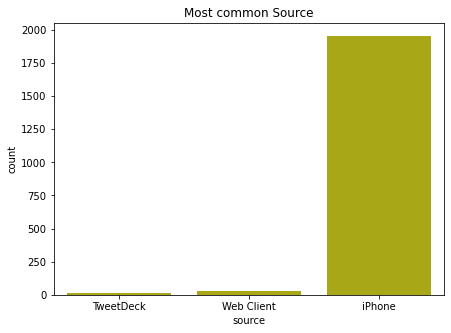

In [63]:
plt.figure(figsize= (7,5))
sns.countplot(data= tweet_dog_ratings, x= 'source', color = 'y').set(title = 'Most common Source')

The most common source of images was the iPhone.

## Most Common Dog Rating

[Text(0.5, 1.0, 'Most Common Dog Rating')]

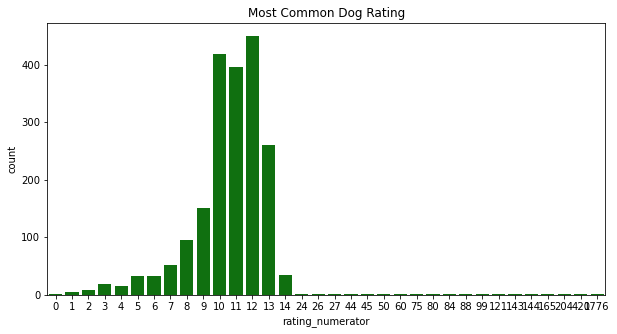

In [64]:
plt.figure(figsize= (10,5))
sns.countplot(data= tweet_dog_ratings, x= 'rating_numerator', color = 'g').set(title = 'Most Common Dog Rating')

The rating numerator shows the rating for each dog. The plot shows the most common rating to be 12, closely followed by 10 and 11. 

## Retweet and Favourite count (Top five)

In [65]:
top_retweet_count = tweet_dog_ratings.nlargest(n = 5, columns= 'retweet_count')
top_retweet_count

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1039,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515.0,131075.0
534,807106840509214720,2016-12-09 06:17:20+00:00,iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,...,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56625.0,107015.0
1079,739238157791694849,2016-06-04 23:31:25+00:00,iPhone,Here's a doggo blowing bubbles. It's downright...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1.0,...,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True,52360.0,75163.0
413,822872901745569793,2017-01-21 18:26:02+00:00,iPhone,Here's a super supportive puppo participating ...,13,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265.0,132810.0
66,879415818425184262,2017-06-26 19:07:24+00:00,iPhone,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,...,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,45849.0,107956.0


[Text(0.5, 1.0, 'Highest Retweets')]

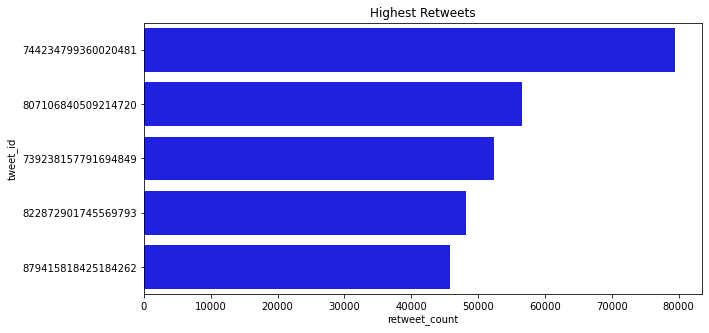

In [66]:
plt.figure(figsize = (10, 5))
sns.barplot(data= top_retweet_count, y = 'tweet_id', x = 'retweet_count', color = 'b').set(title = 'Highest Retweets')

In [67]:
top_favorite_count = tweet_dog_ratings.nlargest(n = 5, columns= 'favorite_count')
top_favorite_count

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
413,822872901745569793,2017-01-21 18:26:02+00:00,iPhone,Here's a super supportive puppo participating ...,13,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265.0,132810.0
1039,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515.0,131075.0
66,879415818425184262,2017-06-26 19:07:24+00:00,iPhone,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,...,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,45849.0,107956.0
534,807106840509214720,2016-12-09 06:17:20+00:00,iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,...,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56625.0,107015.0
135,866450705531457537,2017-05-22 00:28:40+00:00,iPhone,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,...,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True,32883.0,106827.0


[Text(0.5, 1.0, 'Highest Likes')]

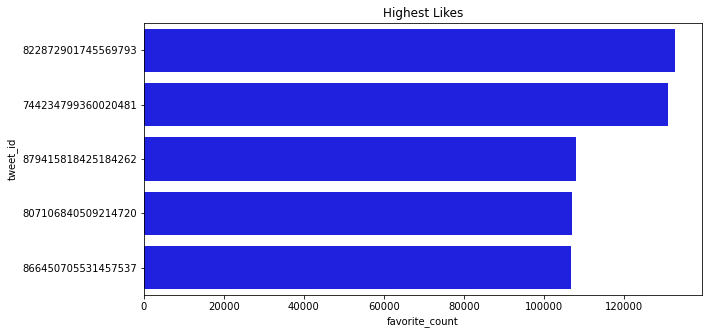

In [68]:
plt.figure(figsize = (10, 5))
sns.barplot(data= top_favorite_count, y = 'tweet_id', x= 'favorite_count', color= 'b',  ).set(title= 'Highest Likes')

# Relationship between Retweet count and Favourite count

[Text(0.5, 1.0, 'Retweet count vs Favorite count')]

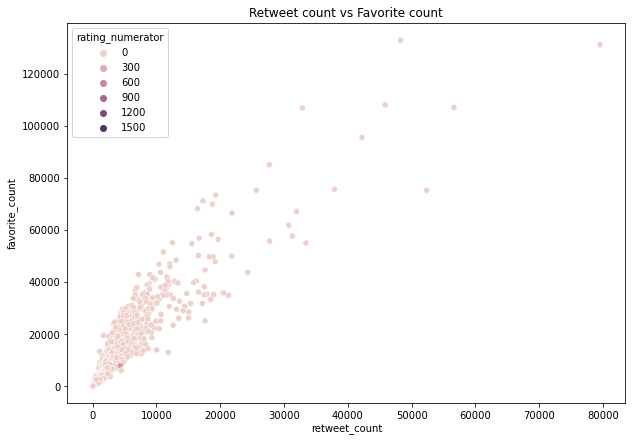

In [69]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data= tweet_dog_ratings , x = 'retweet_count', y = 'favorite_count', hue = 'rating_numerator').set(title = 'Retweet count vs Favorite count')

The scatter plot shows that there is a strong linear relationship between retweet count and favorite count.

In [70]:
tweet_dog_ratings.to_csv('pl1_tweet_dog_ratings.csv')